# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
data = pd.read_csv('../datasets/dataTrain_carListings.zip')

In [4]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [5]:
data.shape

(500000, 6)

In [6]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

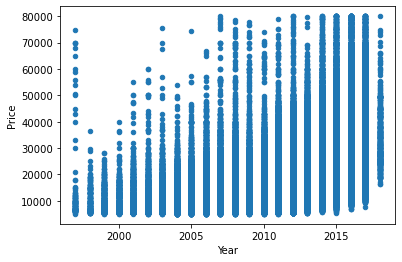

In [7]:
data.plot(kind='scatter', y='Price', x='Year')

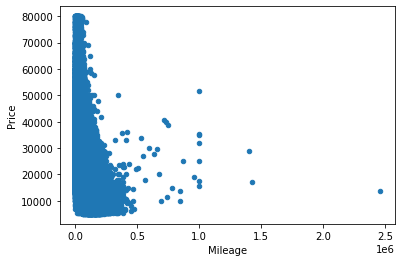

In [8]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [9]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


In [11]:
from sklearn.model_selection import KFold
import numpy as np

In [12]:
def cross_val_score(estimator, X, y, folds=10):
    kf = KFold(n_splits=folds, shuffle=True)
    scores = []
    for train_index, test_index in kf.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train)
        scores.append(estimator.score(X_test, y_test))
    return np.mean(scores)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
reg = RandomForestRegressor(n_jobs=-1)

In [25]:
X = data.iloc[:,1:-1]
y = data[["Price"]]

In [ ]:
reg.fit(pd.get_dummies(X), y)

<ipython-input-26-3e0020a9973b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(pd.get_dummies(X), y)


In [ ]:
cross_val_score

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
